## This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.


In [864]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')


### Importing dataset

In [798]:
df = pd.read_csv('kc_house_data.csv')
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [799]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## checking for null values

In [800]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [801]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Exploratory Data Analysis

In [802]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [803]:
df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [804]:
df.view.unique()

array([0, 3, 4, 2, 1], dtype=int64)

In [805]:
df.condition.unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [806]:
df.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1], dtype=int64)

In [807]:
df.waterfront.unique()

array([0, 1], dtype=int64)

In [808]:
df.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33], dtype=int64)

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

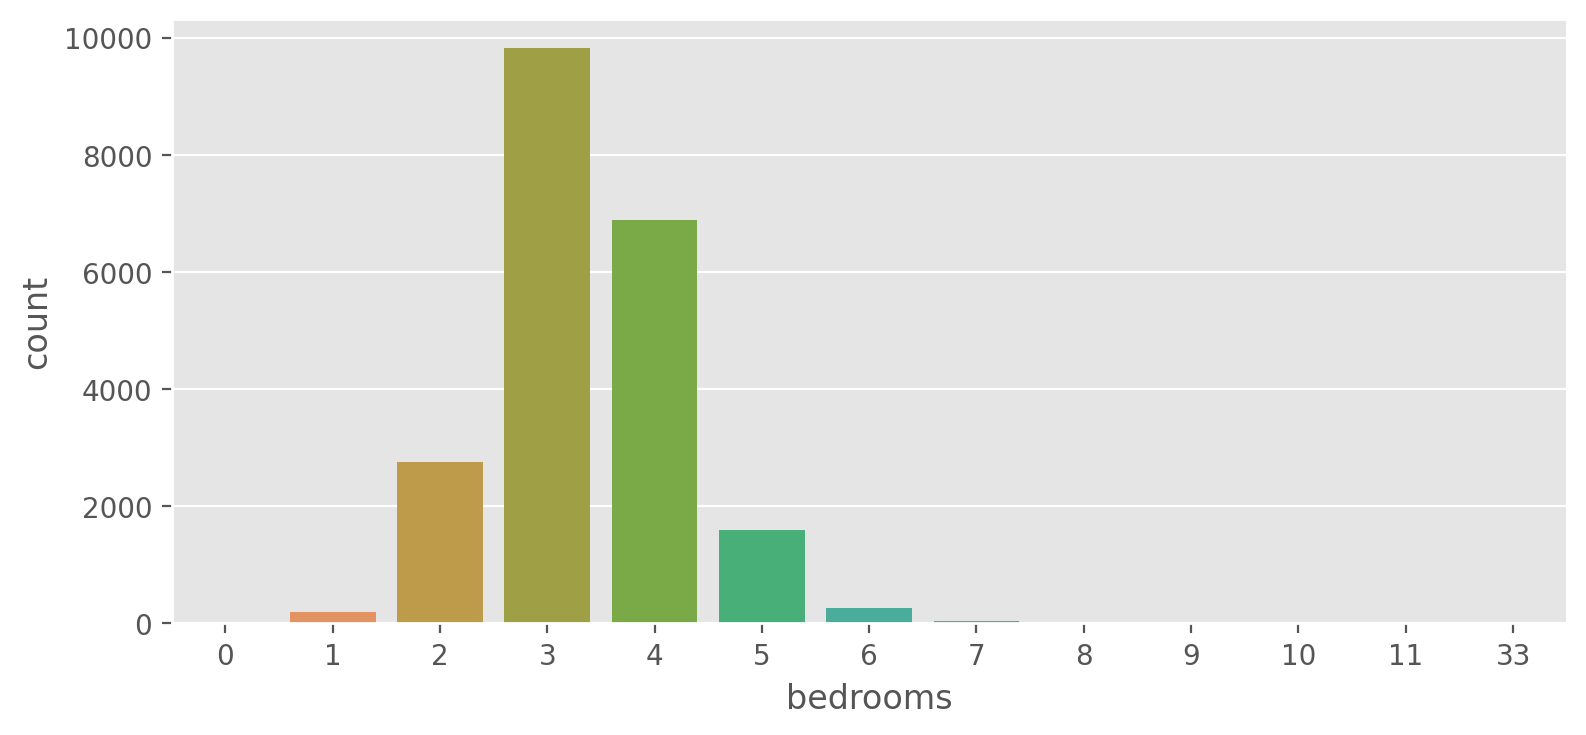

In [809]:

plt.figure(figsize = (9,4), dpi = 200)
sns.countplot('bedrooms', data = df)

<AxesSubplot:xlabel='waterfront', ylabel='price'>

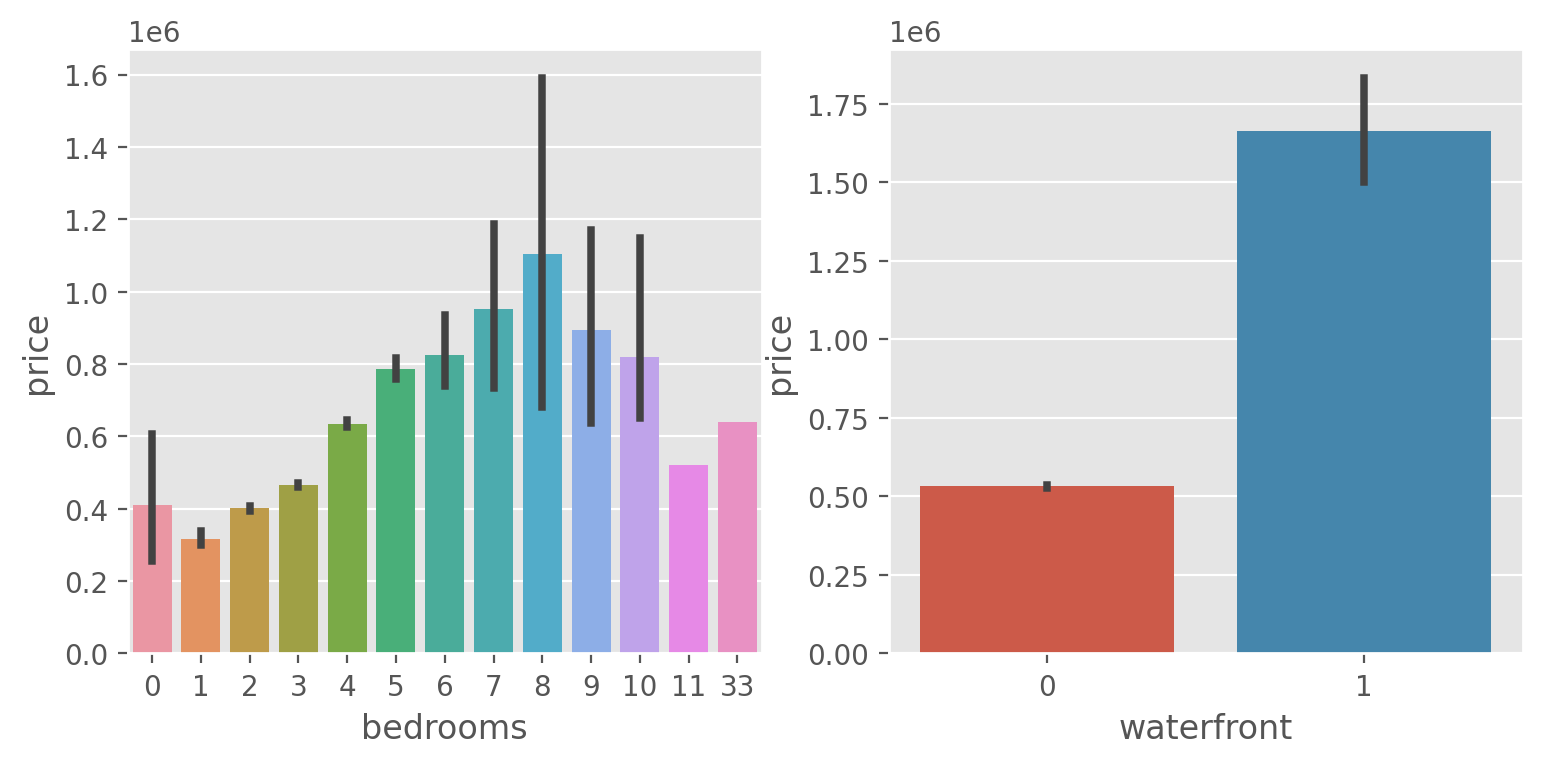

In [810]:
fig = plt.figure(figsize = (9,4), dpi = 200)
p1 = fig.add_subplot(1,2,1)
sns.barplot(x = 'bedrooms',y = 'price', data = df)
p2 = fig.add_subplot(1,2,2)
sns.barplot(x = 'waterfront',y = 'price', data = df)

<AxesSubplot:xlabel='floors', ylabel='price'>

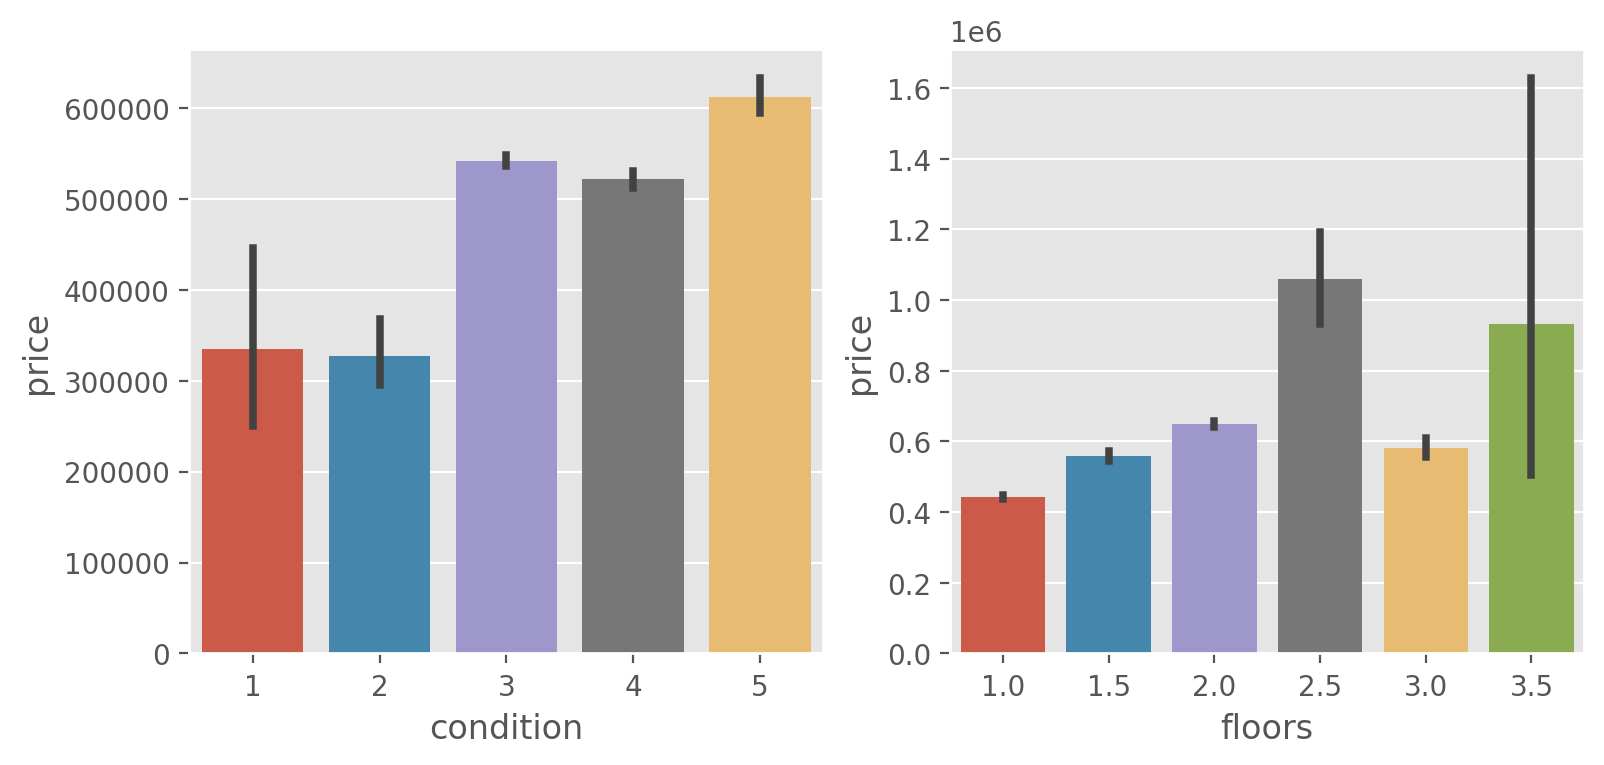

In [811]:
fig = plt.figure(figsize = (9,4), dpi = 200)
p1 = fig.add_subplot(1,2,1)
sns.barplot(x = 'condition',y = 'price', data = df)
p2 = fig.add_subplot(1,2,2)
sns.barplot(x = 'floors',y = 'price', data = df)

<AxesSubplot:xlabel='floors', ylabel='price'>

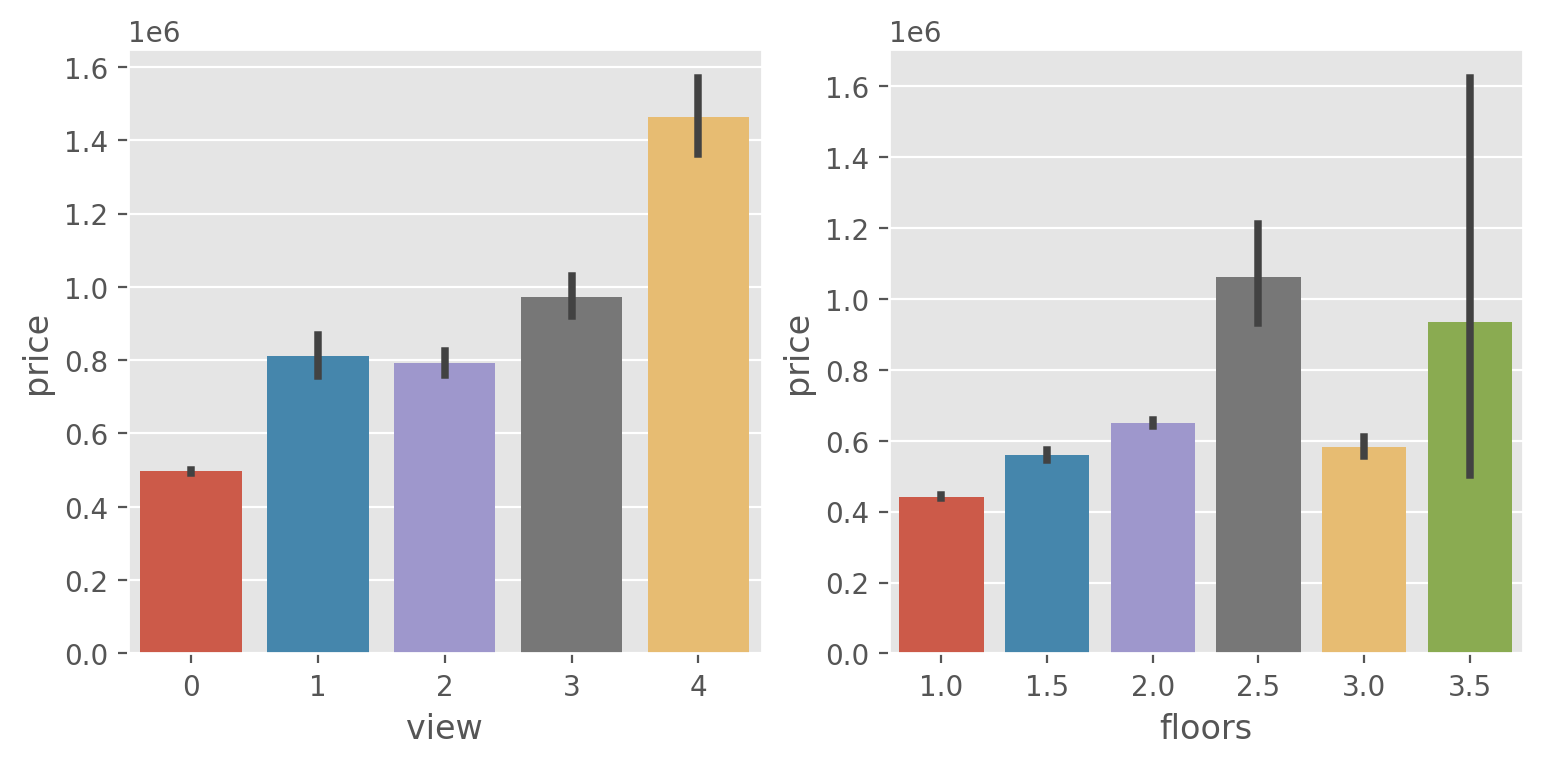

In [812]:
fig = plt.figure(figsize = (9,4), dpi = 200)
p1 = fig.add_subplot(1,2,1)
sns.barplot(x = 'view',y = 'price', data = df)
p2 = fig.add_subplot(1,2,2)
sns.barplot(x = 'floors',y = 'price', data = df)

<AxesSubplot:xlabel='price', ylabel='Density'>

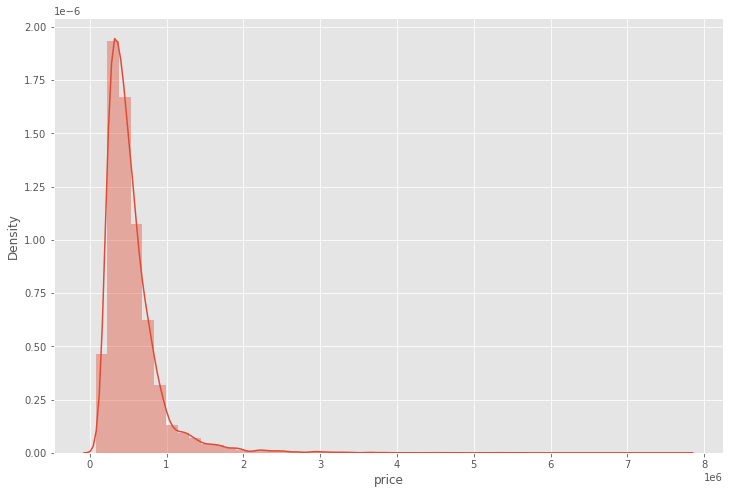

In [813]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'])

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

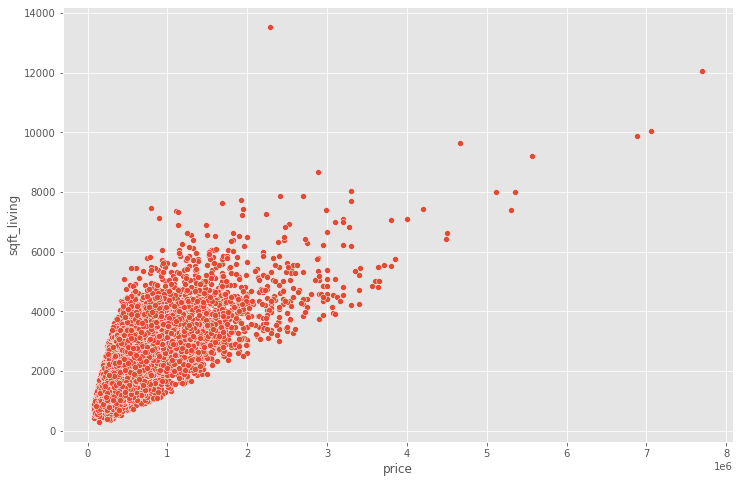

In [814]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df)

In [815]:
df.duplicated().sum()

0

In [816]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [817]:
df.view.unique()

array([0, 3, 4, 2, 1], dtype=int64)

## feature engineering

### select important independant features to  predict the output

In [818]:
df1=df.drop(['id','date','yr_renovated','zipcode','long','sqft_basement'],axis=1)
df1=df.copy()

In [819]:
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [820]:
df1['No_bathroom'] = df1['bathrooms'].apply(np.floor)
print(df1)

               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  sqft_above  \
0             1180      5650     1.0           0     0  ...        1180   
1             2570   

In [821]:
df1['No_floors'] = df1['floors'].apply(np.floor)
print(df1)

               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  sqft_basement  \
0             1180      5650     1.0           0     0  ...              0   
1             2

In [822]:
df2=df1.drop(['bathrooms','floors','date'],axis=1)

In [823]:
df2.head()

,id,price,bedrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,No_bathroom,No_floors
0,7129300520,221900.0,3,1180,5650,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1.0,1.0
1,6414100192,538000.0,3,2570,7242,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2.0,2.0
2,5631500400,180000.0,2,770,10000,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,1.0,1.0
3,2487200875,604000.0,4,1960,5000,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,3.0,1.0
4,1954400510,510000.0,3,1680,8080,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2.0,1.0


In [824]:
df2.shape

(21613, 20)

In [825]:
df2[df2.bedrooms+1<df2.No_bathroom]

,id,price,bedrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,No_bathroom,No_floors
7252,6762700020,7700000.0,6,12050,27600,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,8.0,2.0
8477,2569500210,339950.0,0,2290,8319,0,0,3,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751,2.0,2.0
8484,2310060040,240000.0,0,1810,5669,0,0,3,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685,2.0,2.0
12653,7849202299,320000.0,0,1490,7111,0,0,3,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675,2.0,2.0


In [826]:
df3=df2[df2.bedrooms+1>df2.No_bathroom]
df3.head()

,id,price,bedrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,No_bathroom,No_floors
0,7129300520,221900.0,3,1180,5650,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1.0,1.0
1,6414100192,538000.0,3,2570,7242,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2.0,2.0
2,5631500400,180000.0,2,770,10000,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,1.0,1.0
3,2487200875,604000.0,4,1960,5000,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,3.0,1.0
4,1954400510,510000.0,3,1680,8080,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2.0,1.0


In [827]:
df3.shape

(21523, 20)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

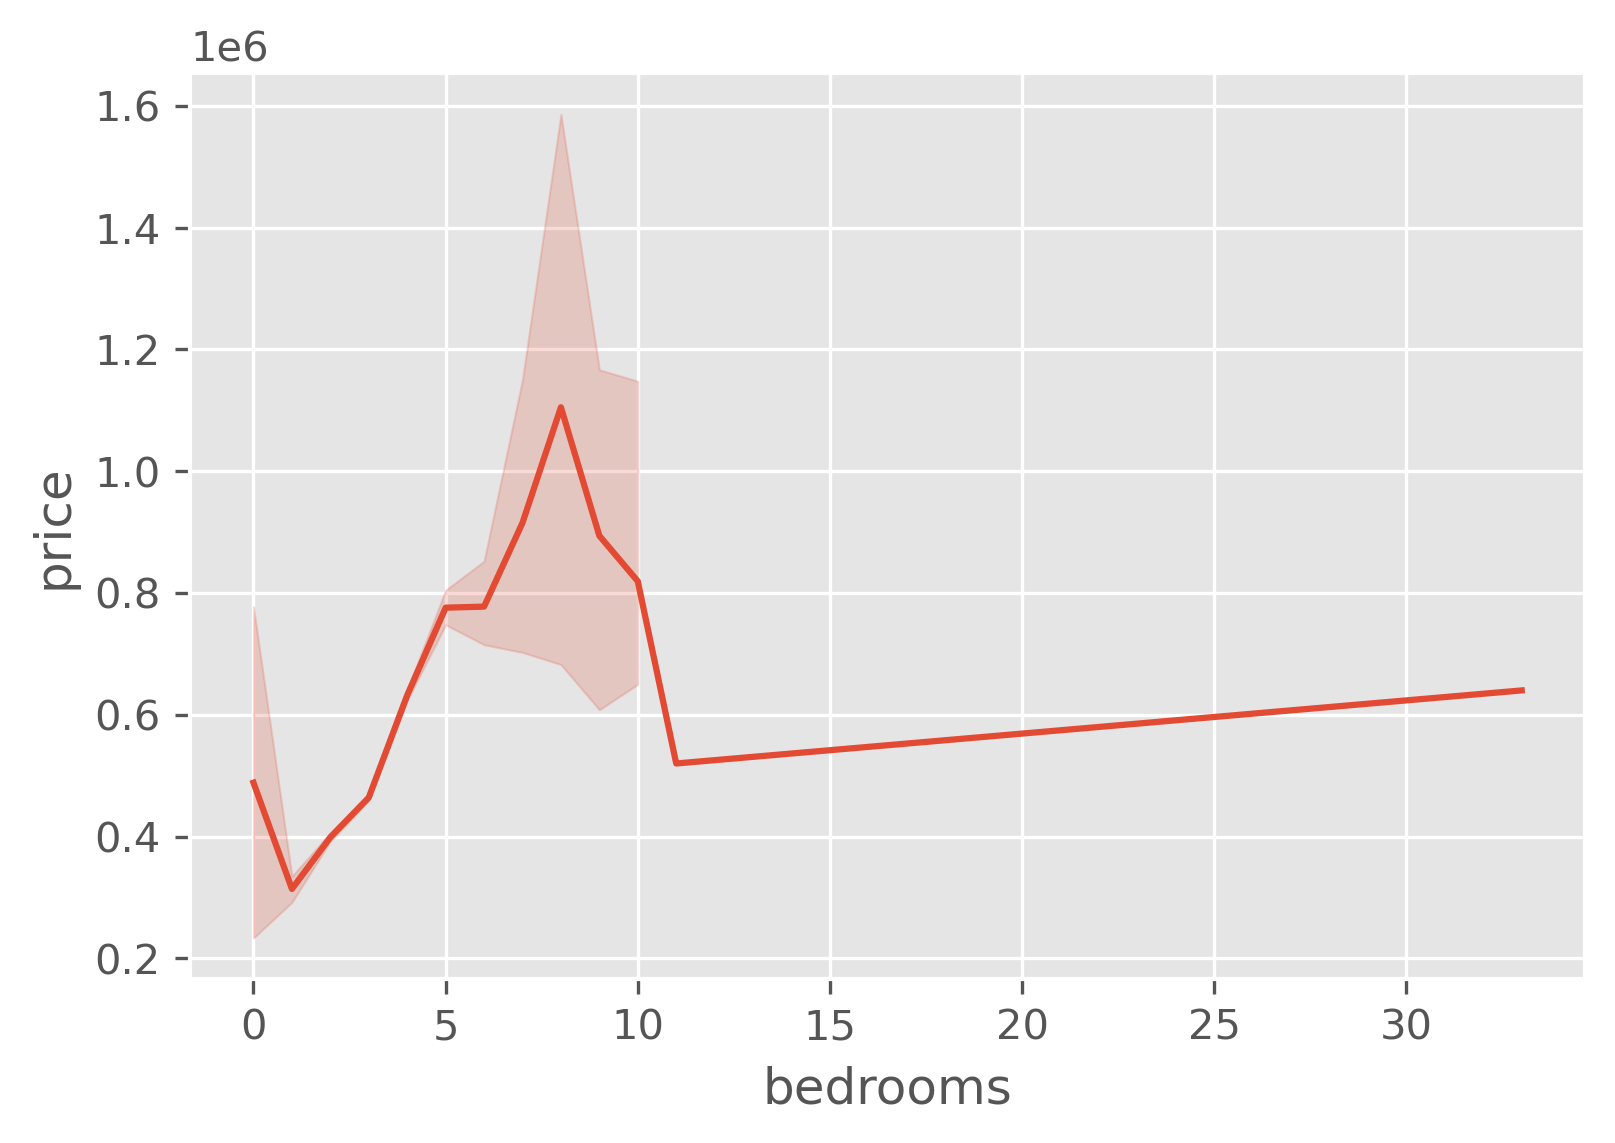

In [828]:
plt.figure(figsize=(6,4),dpi=300)
sns.lineplot(df3.bedrooms,df3.price)

In [829]:
df3[df3.bedrooms>8]

,id,price,bedrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,No_bathroom,No_floors
4096,1997200215,599999.0,9,3830,6988,0,0,3,7,2450,1380,1938,0,98103,47.6927,-122.338,1460,6291,4.0,2.0
4235,2902200015,700000.0,9,3680,4400,0,0,3,7,2830,850,1908,0,98102,47.6374,-122.324,1960,2450,3.0,2.0
6079,9822700190,1280000.0,9,3650,5000,0,0,3,8,2530,1120,1915,2010,98105,47.6604,-122.289,2510,5000,4.0,2.0
8546,424049043,450000.0,9,4050,6504,0,0,3,7,4050,0,1996,0,98144,47.5923,-122.301,1448,3866,7.0,2.0
8757,1773100755,520000.0,11,3000,4960,0,0,3,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960,3.0,2.0
13314,627300145,1148000.0,10,4590,10920,0,2,3,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400,5.0,1.0
15161,5566100170,650000.0,10,3610,11914,0,0,4,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914,2.0,2.0
15870,2402100895,640000.0,33,1620,6000,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,1.0,1.0
16844,8823900290,1400000.0,9,4620,5508,0,0,3,11,3870,750,1915,0,98105,47.6684,-122.309,2710,4320,4.0,2.0
18443,8823901445,934000.0,9,2820,4480,0,0,3,7,1880,940,1918,0,98105,47.6654,-122.307,2460,4400,3.0,2.0


In [830]:
df4=df3[df3.bedrooms<8]
df4.shape

(21499, 20)

<AxesSubplot:xlabel='yr_built', ylabel='price'>

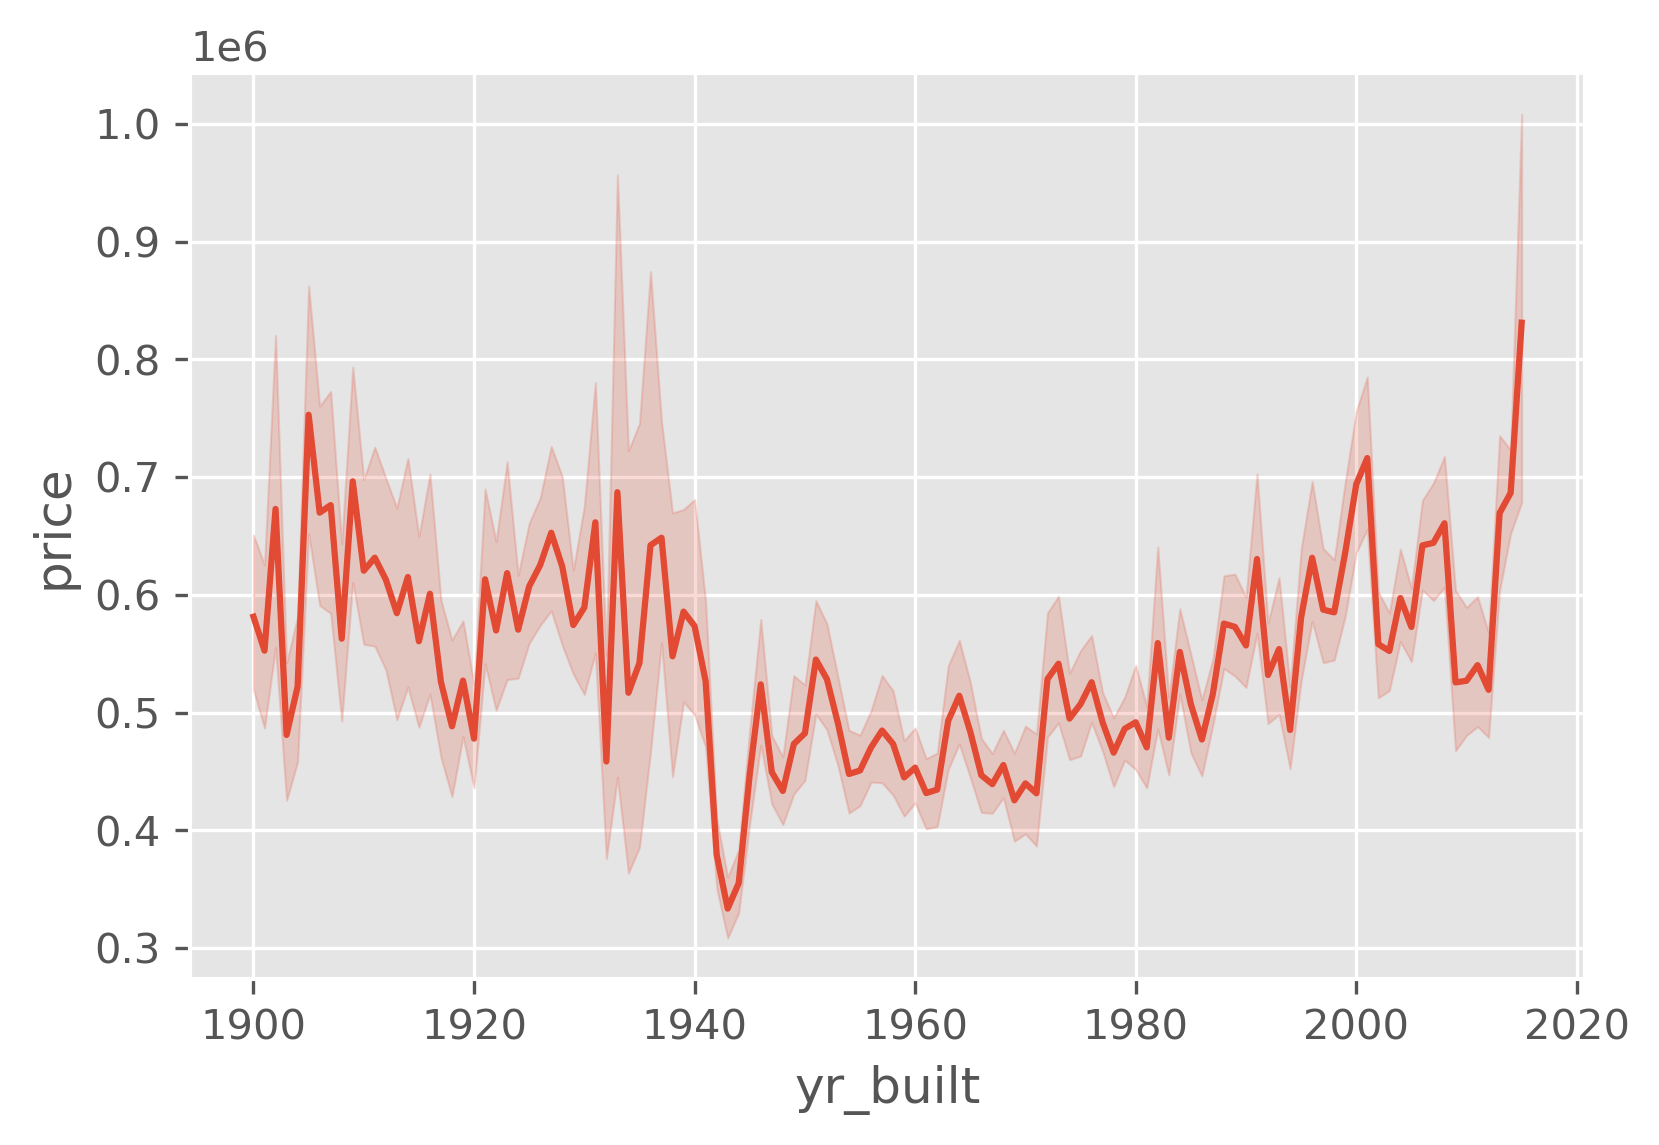

In [860]:
plt.figure(figsize=(6,4),dpi=300)
sns.lineplot(df5.yr_built,df5.price)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

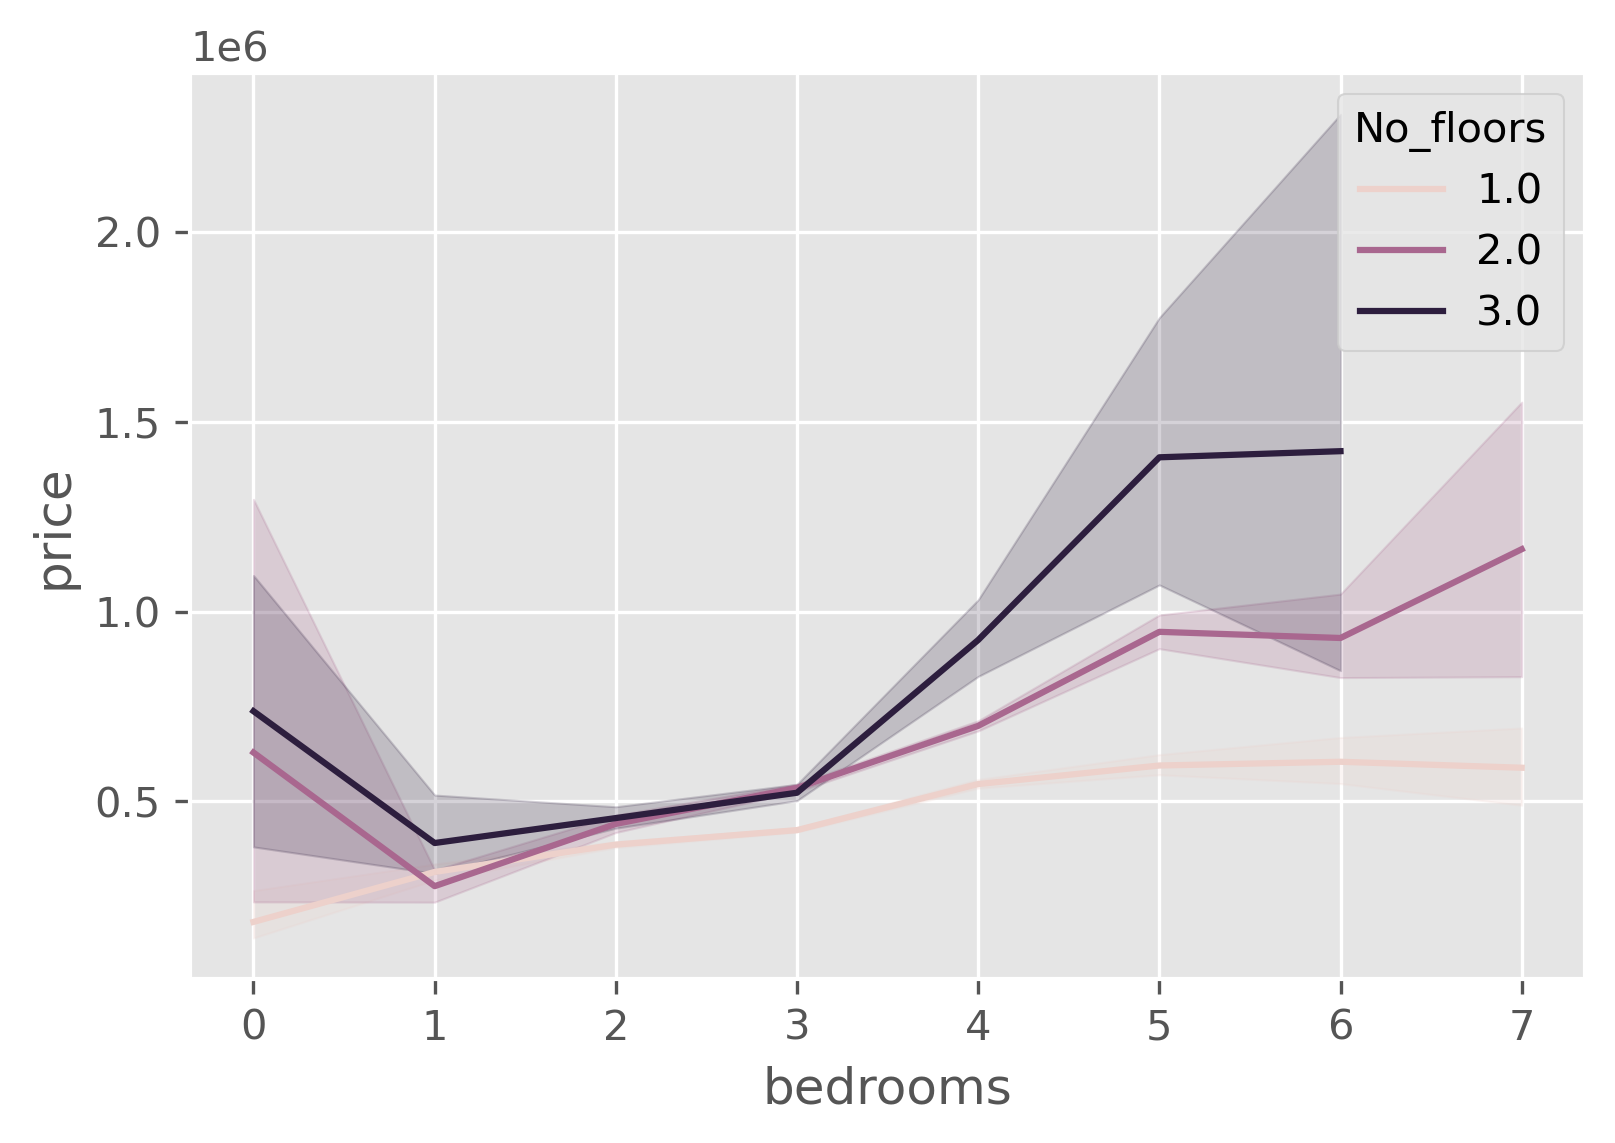

In [831]:
plt.figure(figsize=(6,4),dpi=300)
sns.lineplot(df4.bedrooms,df4.price,hue=df4.No_floors)

<AxesSubplot:xlabel='No_floors', ylabel='price'>

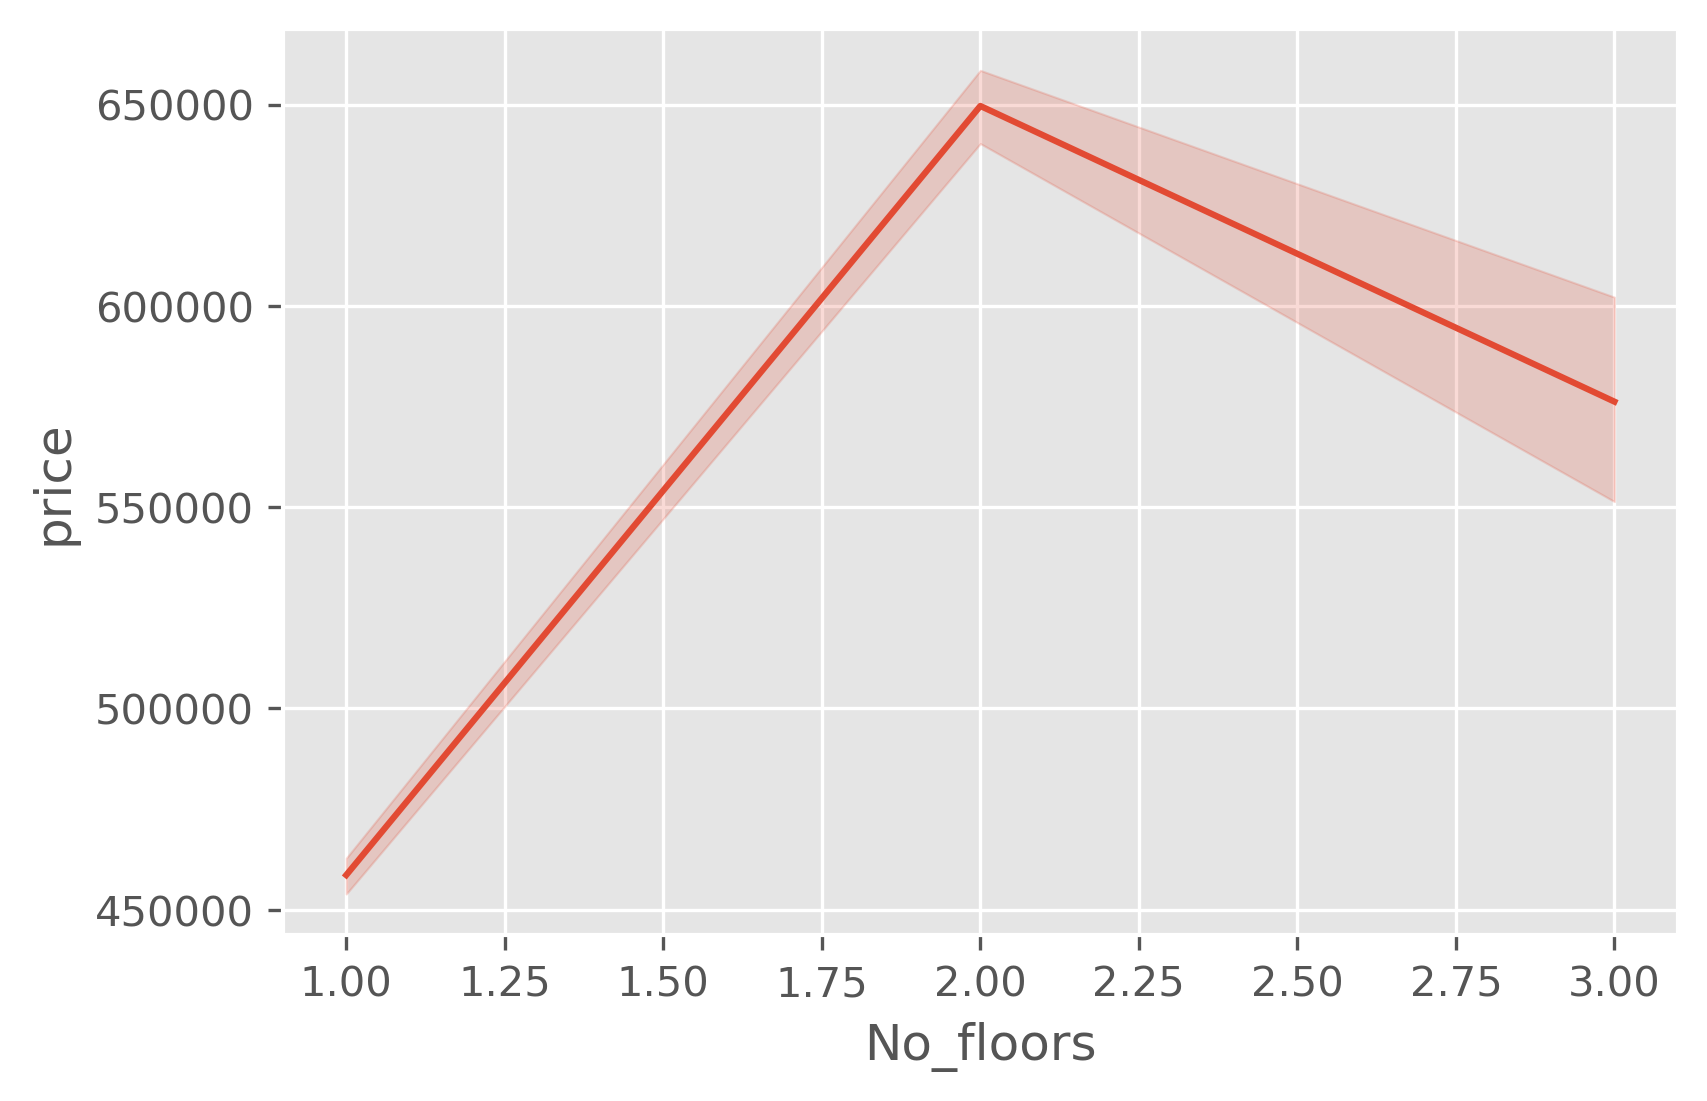

In [832]:
plt.figure(figsize=(6,4),dpi=300)
sns.lineplot(df4.No_floors,df4.price)

In [833]:
df5=df4[df3.No_floors<3]
df5.shape

(20890, 20)

<AxesSubplot:>

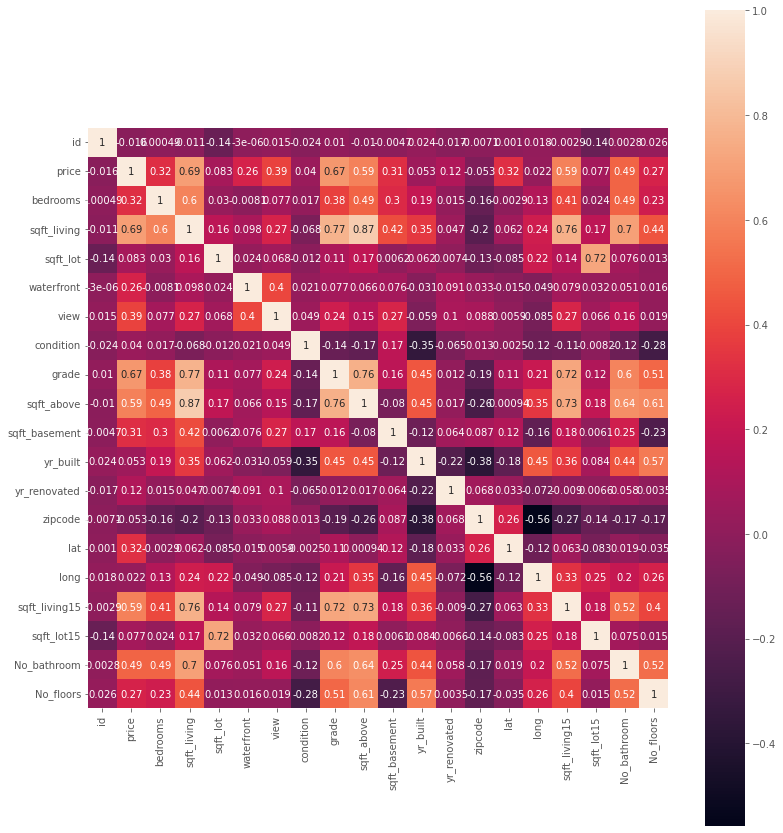

In [834]:
fig, ax = plt.subplots(figsize=(13,15))
corr_matrix=df5.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix,annot=True, square=True)

<AxesSubplot:ylabel='bedrooms'>

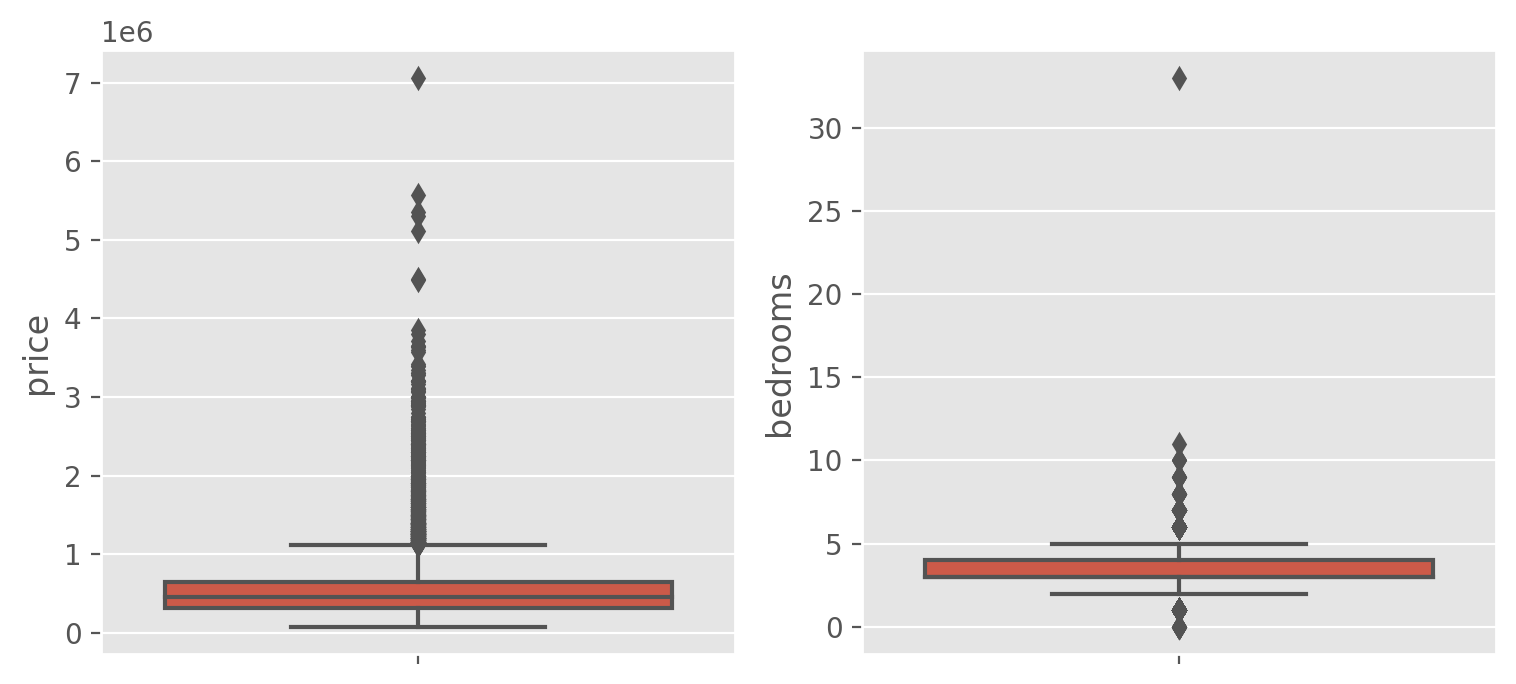

In [835]:

fig = plt.figure(figsize = (9,4), dpi = 200)
p1 = fig.add_subplot(1,2,1)
sns.boxplot( y = 'price', data = df5)
p2 = fig.add_subplot(1,2,2)
sns.boxplot( y = 'bedrooms', data = df)

<AxesSubplot:xlabel='view', ylabel='price'>

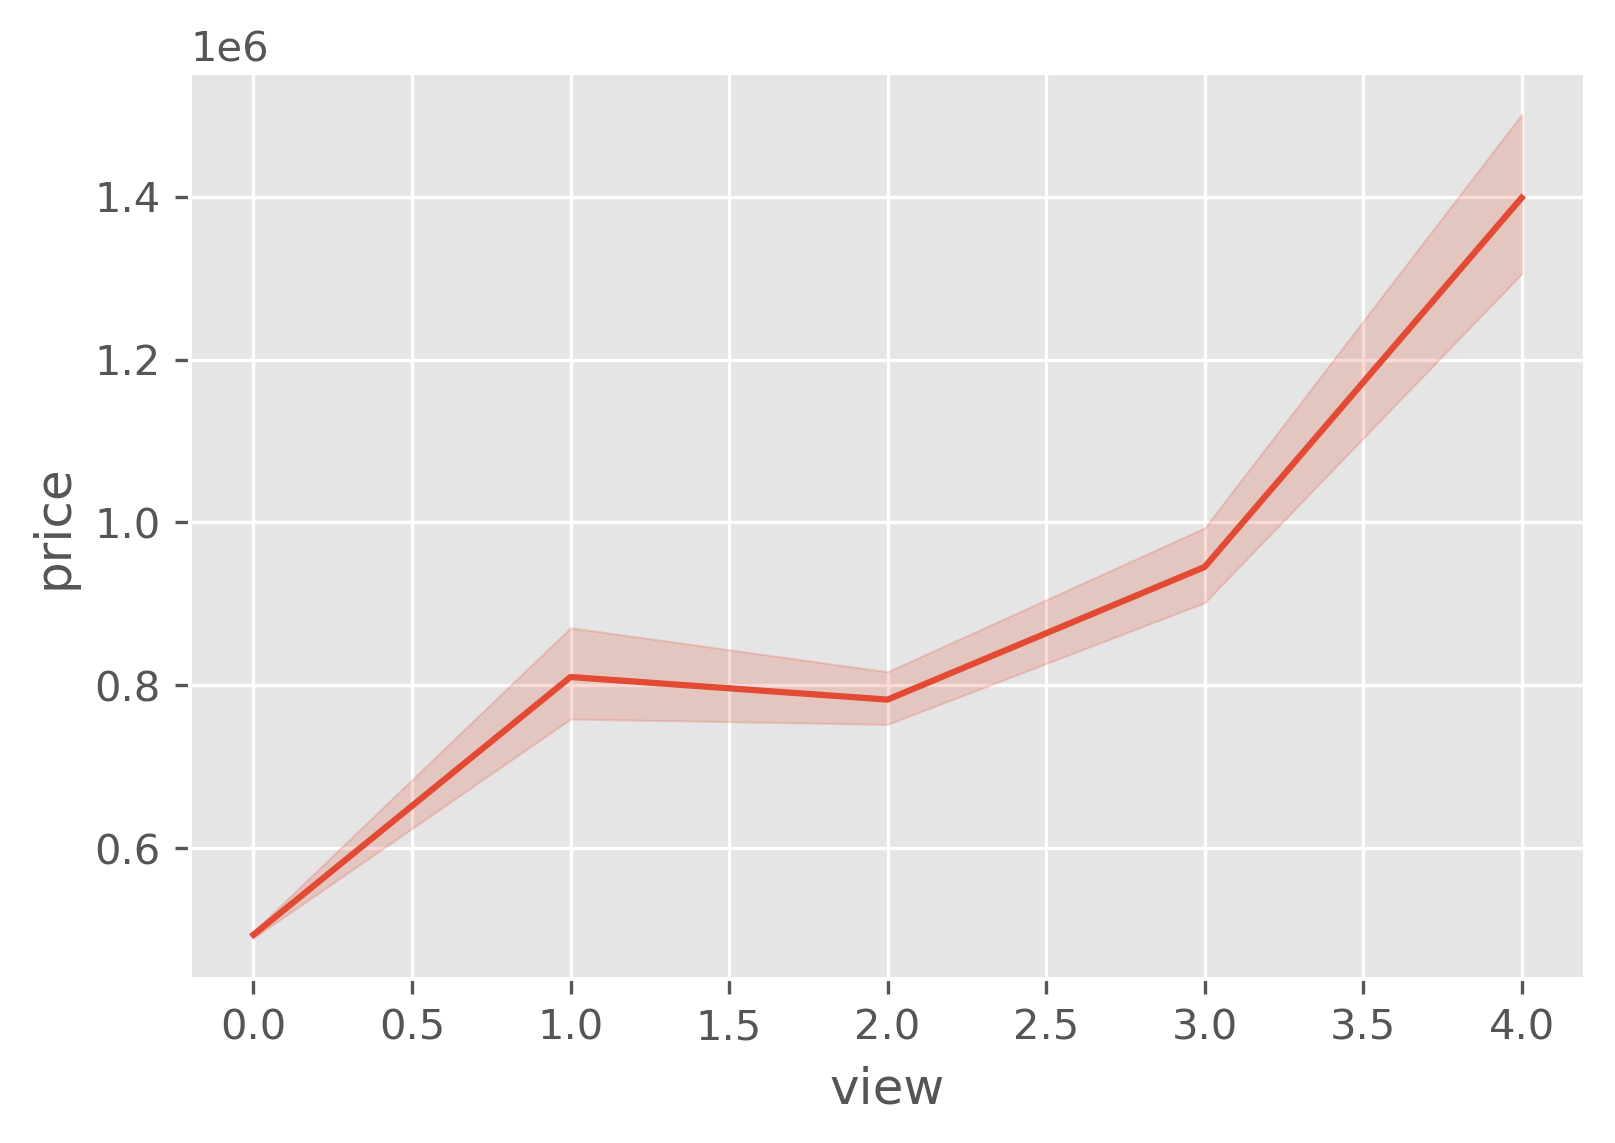

In [861]:
plt.figure(figsize=(6,4),dpi=300)
sns.lineplot(df5.view,df5.price)

In [836]:
df5.bedrooms.unique()

array([3, 2, 4, 5, 1, 6, 7, 0], dtype=int64)

<AxesSubplot:xlabel='No_floors', ylabel='price'>

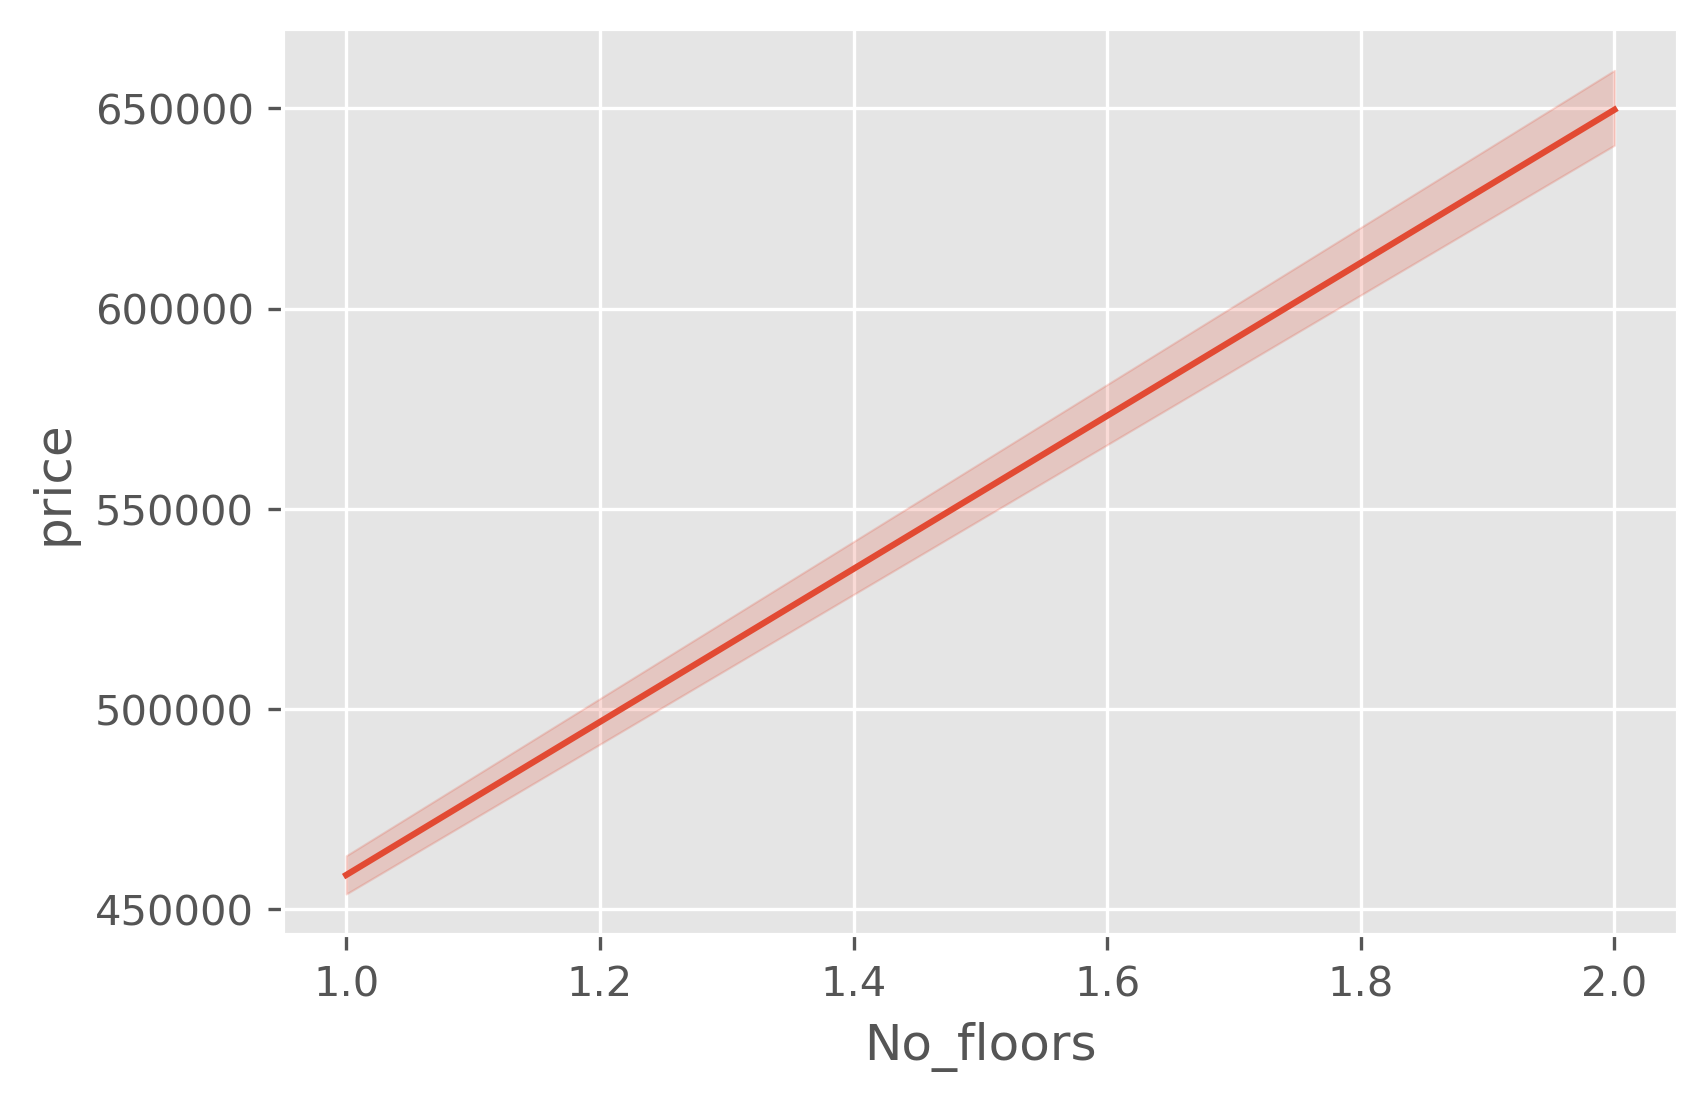

In [837]:
plt.figure(figsize=(6,4),dpi=300)
sns.lineplot(df5.No_floors,df5.price)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

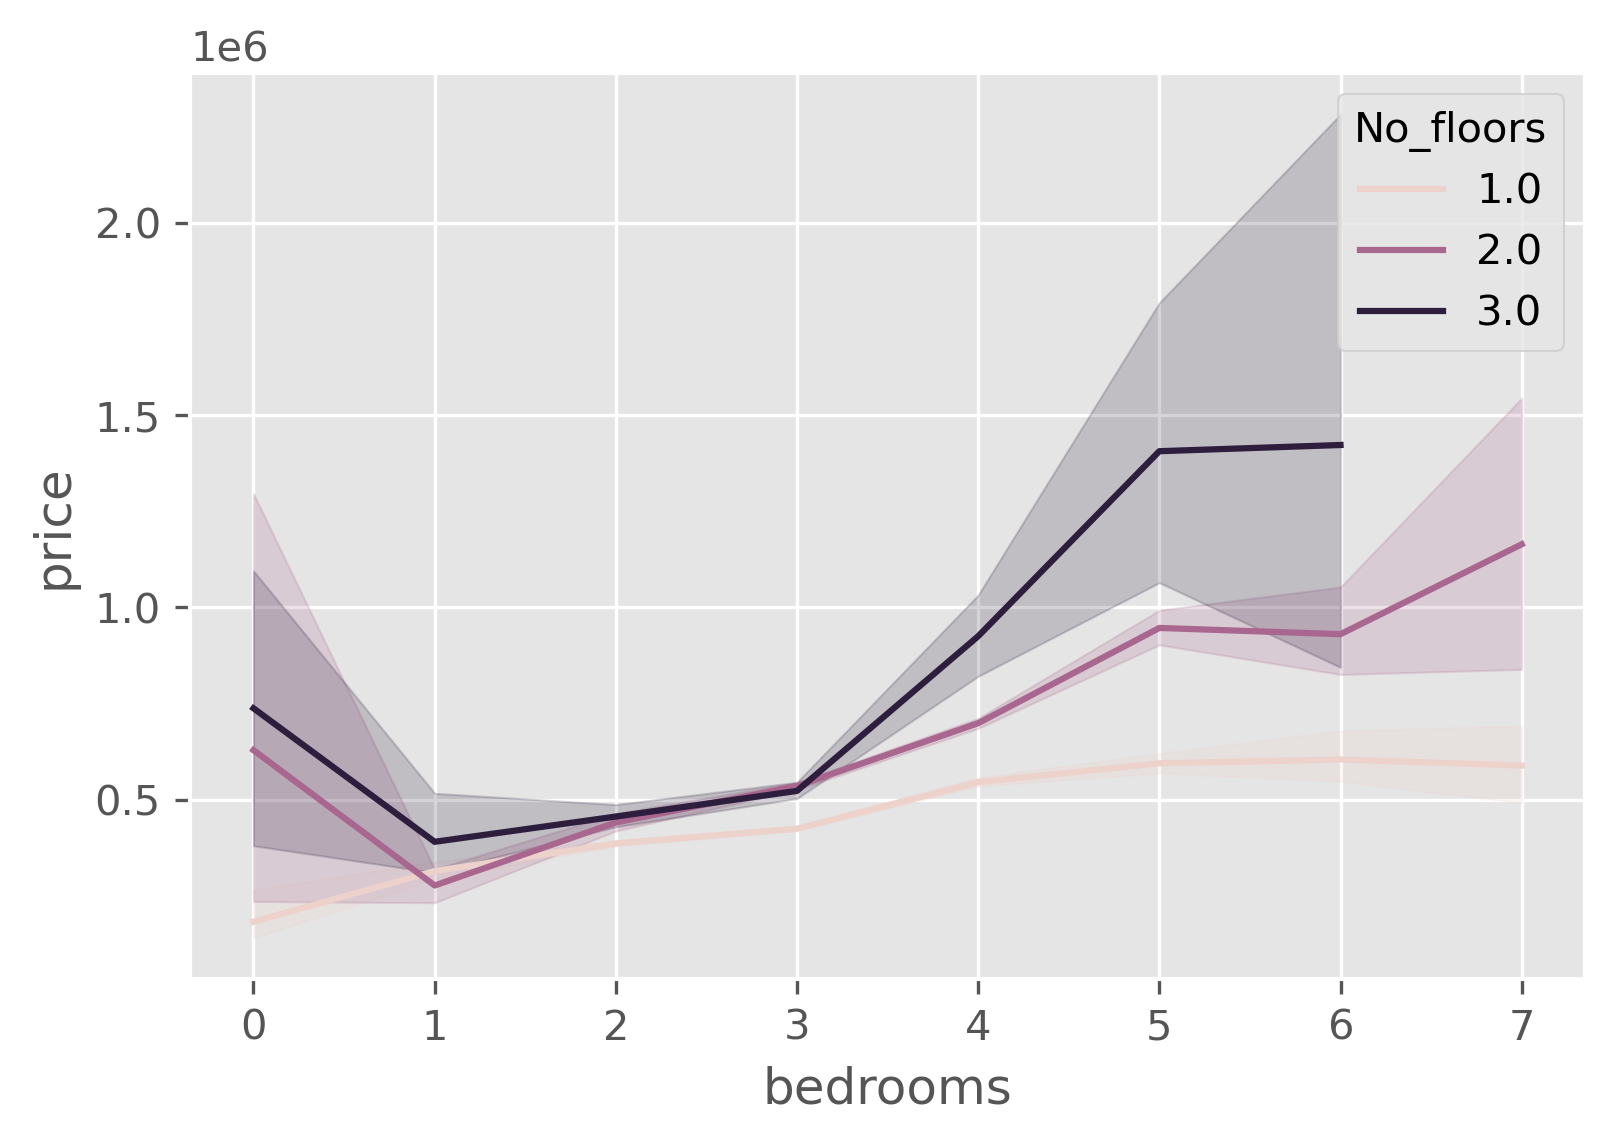

In [838]:
plt.figure(figsize=(6,4),dpi=300)
sns.lineplot(df4.bedrooms,df4.price,hue=df4.No_floors)

In [839]:
df5.head()

,id,price,bedrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,No_bathroom,No_floors
0,7129300520,221900.0,3,1180,5650,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1.0,1.0
1,6414100192,538000.0,3,2570,7242,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2.0,2.0
2,5631500400,180000.0,2,770,10000,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,1.0,1.0
3,2487200875,604000.0,4,1960,5000,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,3.0,1.0
4,1954400510,510000.0,3,1680,8080,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2.0,1.0


In [840]:
x=df5.drop(['price'],axis=1)

In [841]:
x

,id,bedrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,No_bathroom,No_floors
0,7129300520,3,1180,5650,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1.0,1.0
1,6414100192,3,2570,7242,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2.0,2.0
2,5631500400,2,770,10000,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,1.0,1.0
3,2487200875,4,1960,5000,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,3.0,1.0
4,1954400510,3,1680,8080,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21607,2997800021,3,1310,1294,0,0,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265,2.0,2.0
21609,6600060120,4,2310,5813,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2.0,2.0
21610,1523300141,2,1020,1350,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,0.0,2.0
21611,291310100,3,1600,2388,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,2.0,2.0


In [842]:
x.shape

(20890, 19)

In [843]:
y=df5.price

In [844]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21607    475000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 20890, dtype: float64

In [845]:
y.shape

(20890,)

In [846]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [847]:
print('Training Data Shape    : ', x_train.shape)
print('Training Labels Shape  : ', y_train.shape)
print('Testing Data Shape     : ', x_test.shape)
print('Testing Labels Shape   : ', y_test.shape)

Training Data Shape    :  (16712, 19)
Training Labels Shape  :  (16712,)
Testing Data Shape     :  (4178, 19)
Testing Labels Shape   :  (4178,)


## Training the Model

In [848]:
from sklearn.linear_model import LinearRegression
model =LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.6939675210744636

In [849]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
crossValidation=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv=crossValidation)

array([0.69102506, 0.69763892, 0.70145026, 0.70681634, 0.70186757])

## Training and checking accuracy score for all regression models

In [850]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.699760,{'normalize': True}
1,lasso,0.699761,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.757583,"{'criterion': 'mse', 'splitter': 'best'}"


In [853]:
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(x_test)
mean_absolute_error(y_test, y_pred)

123346.59229018995

In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
#score
from sklearn.metrics import r2_score


lr  = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=10)
dt  = DecisionTreeRegressor(max_depth = 3)
rf  = RandomForestRegressor(max_depth = 3, n_estimators=500)
ada = AdaBoostRegressor( n_estimators=50, learning_rate =.01)
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)
xgb = XGBRegressor(max_depth = 3, n_estimators=50, learning_rate =.2)
cb  = CatBoostRegressor(learning_rate =.01, max_depth =5, verbose = 0)


regressors = [('Linear Regression', lr), ('K Nearest Neighbours', knn),('Decision Tree', dt), ('Random Forest', rf), 
              ('AdaBoost', ada),('Gradient Boosting Regressor', gbr),('XGBRegressor', xgb),('CatBoostRegressor', cb)]

Linear Regression : 69 %
K Nearest Neighbours : 31 %
Decision Tree : 61 %
Random Forest : 66 %
AdaBoost : 65 %
Gradient Boosting Regressor : 86 %
XGBRegressor : 87 %
CatBoostRegressor : 89 %


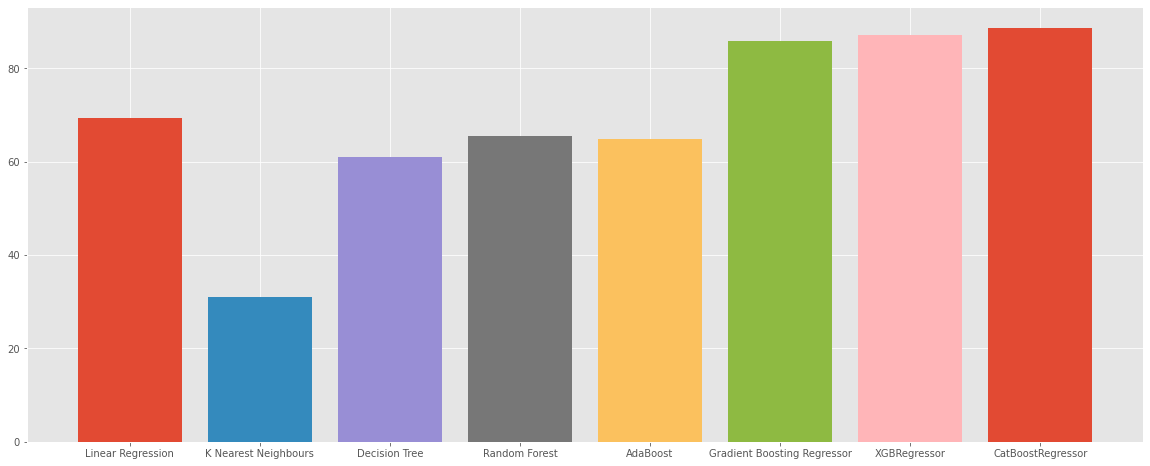

In [855]:
for regressor_name, regressor in regressors:

    regressor.fit(x_train, y_train)    
  
    y_pred = regressor.predict(x_test)
    accuracy = round(r2_score(y_test,y_pred),3)*100
    
    print('{:s} : {:.0f} %'.format(regressor_name, accuracy))
    plt.rcParams["figure.figsize"] = (20,8)
    plt.bar(regressor_name,accuracy)

In [866]:
for regressor_name, regressor in regressors:

    regressor.fit(x_train, y_train)    
  
    y_pred = regressor.predict(x_test)
    accuracy_score =mean_absolute_error(y_test, y_pred)
    
    print('{:s} : {:.0f} '.format(regressor_name, accuracy_score))
   
    

Linear Regression : 123347 
K Nearest Neighbours : 172141 
Decision Tree : 133040 
Random Forest : 128041 
AdaBoost : 126807 
Gradient Boosting Regressor : 81134 
XGBRegressor : 76581 
CatBoostRegressor : 71627 
